In [122]:
import numpy as np
import pandas as pd

In [123]:
RCDF = pd.read_csv("Cust_Spend_Data.csv")
RCDF

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [124]:
## Distance Computation
from scipy.spatial.distance import pdist, squareform
pdist ## Ctrl + i
help(pdist)
d_euc = pdist(RCDF.ix[:,2:7], metric  = "euclidean") ## index starts from '0',last one is exclusive i.e., 7 is exclusive.

type(d_euc)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', p=None, w=None, V=None, VI=None)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : ndarray
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'kulsinski', 'mahalanobis', 'matching',
        'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
    p : double, optional
        The p-norm to apply
        Only for Minkowski, weighted and unweighted. Default: 2.
    w : ndarray, optional
        The weight vector.
        Only for weighted Minkowski

C:\Users\nagapavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


numpy.ndarray

In [125]:
## Building the Clusters
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

help(linkage)
clus1 = linkage(d_euc, method = "average")

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering.
    
    The input y may be either a 1d compressed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d compressed distance matrix,
    then y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
  

In [126]:
## Displaying the Clusters in Dendrogram
import matplotlib.pyplot as plt
dendrogram(clus1, labels=RCDF.ix[:,[1]].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram', fontweight='bold', fontsize=14);


In [127]:
## Hierarchical Clustering with Scaling
from sklearn.preprocessing import scale as scale
## scale function standardizes the values
## Note - The scale function calculates the 
## Std. Dev assuming data is Sample
scaled_RCDF = scale(RCDF.ix[:,2:7])
scaled_RCDF

array([[ 1.88649751, -1.24034735,  1.52752523, -0.74143264, -1.38013112],
       [ 0.78756692, -0.62017367, -0.65465367,  1.28065638,  1.7251639 ],
       [ 0.78756692,  1.86052102,  1.52752523, -0.29207953,  0.        ],
       [ 0.60441182,  0.62017367,  1.52752523, -0.74143264,  0.        ],
       [ 0.42125673,  1.24034735, -0.65465367,  1.7300095 , -0.34503278],
       [-0.31136367, -0.62017367, -0.65465367, -0.74143264,  1.38013112],
       [-0.86082896,  0.62017367, -0.65465367,  1.50533294, -0.69006556],
       [-0.86082896, -0.62017367, -0.65465367, -0.74143264, -1.03509834],
       [-1.04398406, -1.24034735, -0.65465367, -0.51675608, -0.69006556],
       [-1.41029426,  0.        , -0.65465367, -0.74143264,  1.03509834]])

In [128]:
## Note - Here we are scaling taking 
## the data as Population
scaled_RCDF = RCDF.ix[:,2:7].apply(
        lambda x: (x- x.mean())/x.std())
scaled_RCDF

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.789689,-1.176697,1.449138,-0.703385,-1.309307
1,0.747152,-0.588348,-0.621059,1.214937,1.636634
2,0.747152,1.765045,1.449138,-0.277091,0.000000
3,0.573395,0.588348,1.449138,-0.703385,0.000000
4,0.399639,1.176697,-0.621059,1.641231,-0.327327
5,-0.295386,-0.588348,-0.621059,-0.703385,1.309307
6,-0.816654,0.588348,-0.621059,1.428084,-0.654654
7,-0.816654,-0.588348,-0.621059,-0.703385,-0.981981
8,-0.990410,-1.176697,-0.621059,-0.490238,-0.654654
9,-1.337923,0.000000,-0.621059,-0.703385,0.981981


In [129]:
scaled_RCDF = scale(RCDF.ix[:,2:7])
d_euc = pdist(scaled_RCDF, 
              metric  = "euclidean")
clus2 = linkage(d_euc, method = "average")

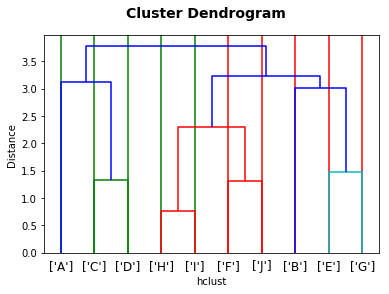

In [130]:
dendrogram(clus2, 
           labels=RCDF.ix[:,[1]].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram', 
             fontweight='bold', fontsize=14)
plt.show();


In [131]:
print(np.round(squareform(d_euc).tolist(),3))

distance = clus2[:,2]
distance

[[ 0.     4.482  3.596  2.648  4.499  4.195  4.615  3.58   3.725  4.796]
 [ 4.482  0.     4.045  3.66   2.843  2.327  3.184  3.798  3.578  3.127]
 [ 3.596  4.045  0.     1.332  3.08   3.772  3.567  3.861  4.273  3.785]
 [ 2.648  3.66   1.332  0.     3.377  3.007  3.526  3.085  3.386  3.206]
 [ 4.499  2.843  3.08   3.377  0.     3.617  1.483  3.419  3.67   3.592]
 [ 4.195  2.327  3.772  3.007  3.617  0.     3.343  2.477  2.293  1.308]
 [ 4.615  3.184  3.567  3.526  1.483  3.343  0.     2.589  2.754  2.951]
 [ 3.58   3.798  3.861  3.085  3.419  2.477  2.589  0.     0.767  2.23 ]
 [ 3.725  3.578  4.273  3.386  3.67   2.293  2.754  0.767  0.     2.168]
 [ 4.796  3.127  3.785  3.206  3.592  1.308  2.951  2.23   2.168  0.   ]]


array([ 0.76660834,  1.30817103,  1.33188797,  1.48252699,  2.29187962,
        3.01368978,  3.12171991,  3.23053961,  3.78685213])

In [132]:
## Profiling Step
RCDF['Clusters'] = cut_tree(clus2, 3)
clus_profile = RCDF.ix[:,2:8].groupby(['Clusters'], as_index=False).mean()
clus_profile 


,Clusters,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,0,7833.333333,4.666667,1.0,1.666667,2.666667
1,1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2,2375.000000,3.000000,0.0,1.250000,4.500000


## K Means Clustering

In [133]:
KRCDF = pd.read_csv("Cust_Spend_Data.csv")
KRCDF

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [134]:
from sklearn.preprocessing import scale as scale
scaled_RCDF = scale(KRCDF.ix[:,2:7])

C:\Users\nagapavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [135]:
## Identifying the optimal number of clusters 
# elbow method
cluster_range = range( 1, 6 )
cluster_wss = []
type(cluster_wss)

list

In [136]:
from sklearn.cluster import KMeans
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(scaled_RCDF)
  cluster_wss.append( clusters.inertia_ ) 
  ## append means to assign the value.The cluster function gives 
  ## results of which inertia is nothing but wss.So we are assigning it to wss so that user can understand.
  

In [137]:
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:5]


,num_clusters,cluster_wss
0,1,50.000000
1,2,31.741877
2,3,19.885638
3,4,13.534707
4,5,7.826742


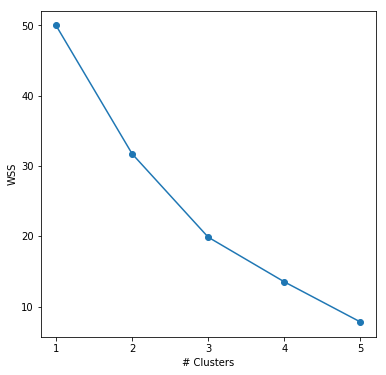

In [138]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(clusters_df.num_clusters), 
                     max(clusters_df.num_clusters)+1, 
                     1.0))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_wss, 
         marker = "o" )
plt.show()

In [139]:
## profiling the clusters
help(KMeans)
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_RCDF)
cluster_labels
KRCDF['Clusters'] = cluster_labels

clus_profile = KRCDF.ix[:,2:8].groupby(['Clusters'], 
                       as_index=False).mean()
clus_profile

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time t

,Clusters,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,0,2375.000000,3.000000,0.0,1.250000,4.500000
1,1,7833.333333,4.666667,1.0,1.666667,2.666667
2,2,5166.666667,4.666667,0.0,11.000000,4.666667


In [140]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_RCDF)


In [141]:
## Getting a Visual Plot 
## Defining Colours and Labels for the Plot
def color_fun (row):
   if (row['Clusters'] == 0):
      return "red"
   if (row['Clusters'] == 1):
      return "green"
   if (row['Clusters'] == 2):
      return "blue"
   return 0

KRCDF['color'] = KRCDF.apply (lambda row: color_fun(row), axis=1)

plot_labels = KRCDF.ix[:,[1]].values.ravel()

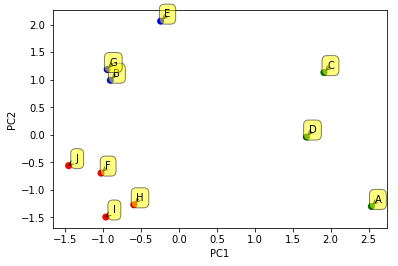

In [147]:
## Show the Cluster Plot
plt.scatter(x=plot_columns[:,0], 
            y=plot_columns[:,1],
            c=KRCDF['color'].values.tolist(),
            s=50, edgecolors='none')

for label, x, y in zip(
        plot_labels, plot_columns[:,0], 
        plot_columns[:,1]) :
    plt.annotate(
    label,
    xy=(x, y), xytext=(10, 2),
    textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.show()